#  Investigation of the Fandango Movie Ratings

Fandango is an online movie ratings aggregator.
In October 2015, a data journalist named Walt Hickey analyzed the movie ratings data and found evidence to suggest that Fandango's rating system was biased: https://fivethirtyeight.com/features/fandango-movies-ratings/

His analysis suggests that movie ratings on Fandango would generally be higher than reality (the 5 stars ratings would be lightly inflated)

__Goal__: let's analyize  more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

## Understanding the Data
I'll use 2 data sets:
- fandango_score_comparison.csv (used by Hickey)
    
    https://github.com/fivethirtyeight/data/tree/master/fandango
- movie_ratings_16_17.csv (one of Dataquest's team members collected movie ratings data for movies released in 2016 and 2017). 
    
    https://github.com/mircealex/Movie_ratings_2016_17 

One of the best ways to figure out whether there has been any change in Fandango's rating system after Hickey's analysis is to compare the system's characteristics previous and after the analysis. 

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

old_ratings = pd.read_csv("fandango_score_comparison.csv")
new_ratings = pd.read_csv("movie_ratings_16_17.csv")

In [53]:
old_ratings.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [54]:
old_ratings.shape

(146, 22)

In [55]:
new_ratings.tail()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
209,X-Men: Apocalypse,2016,52,7.1,48,67,4.0,2.6,3.55,2.40,3.35,2.5,3.5,2.5,3.5
210,XX,2017,64,4.7,71,17,3.0,3.2,2.35,3.55,0.85,3.0,2.5,3.5,1.0
211,xXx: Return of Xander Cage,2017,42,5.4,43,45,4.0,2.1,2.70,2.15,2.25,2.0,2.5,2.0,2.0
212,Zoolander 2,2016,34,4.8,23,21,2.5,1.7,2.40,1.15,1.05,1.5,2.5,1.0,1.0
213,Zootopia,2016,78,8.1,98,92,4.5,3.9,4.05,4.90,4.60,4.0,4.0,5.0,4.5


In [56]:
new_ratings.shape

(214, 15)

In [57]:
old_ratings['FILM'].sort_values()[0:20]

142                        '71 (2015)
36                5 Flights Up (2015)
108             A Little Chaos (2015)
114        A Most Violent Year (2014)
42                  About Elly (2015)
34                       Aloha (2015)
72             American Sniper (2015)
61              American Ultra (2015)
129                        Amy (2015)
47                       Annie (2014)
2                      Ant-Man (2015)
0      Avengers: Age of Ultron (2015)
81                    Big Eyes (2014)
65                     Birdman (2014)
11                   Black Sea (2015)
55              Black or White (2015)
82                    Blackhat (2015)
106                       Cake (2015)
78                     Chappie (2015)
63                    Child 44 (2015)
Name: FILM, dtype: object

In [58]:
new_ratings['movie'].sort_values()[0:20]

0                    10 Cloverfield Lane
1                               13 Hours
2                    A Cure for Wellness
3                        A Dog's Purpose
4                A Hologram for the King
5                        A Monster Calls
6                 A Street Cat Named Bob
7        Alice Through the Looking Glass
8                                 Allied
9                          Amateur Night
10                            Anthropoid
11               Approaching the Unknown
12                               Arrival
13                               Arsenal
14                      Assassin's Creed
15                              Bad Moms
16                           Bad Santa 2
17              Barbershop: The Next Cut
18    Batman V Superman: Dawn of Justice
19                  Beauty and the Beast
Name: movie, dtype: object

__A general overview__ of the ratings distribution - __not intended for analysis__ - but in order to get a general view of the 2 data sets:

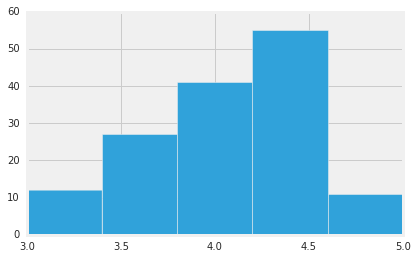

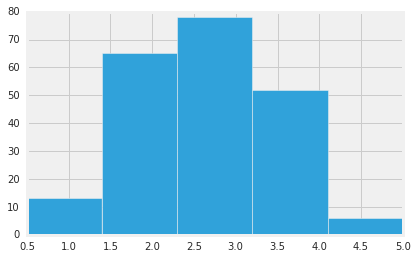

In [59]:
plt.hist(old_ratings['Fandango_Stars'], 5)
plt.show()

plt.hist(new_ratings['nr_metascore'], 5)
plt.show()

with more granularity:

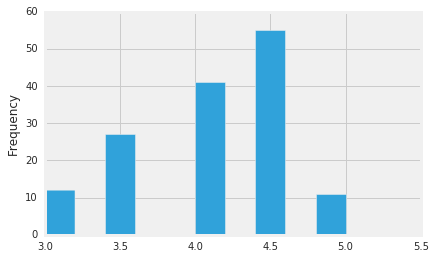

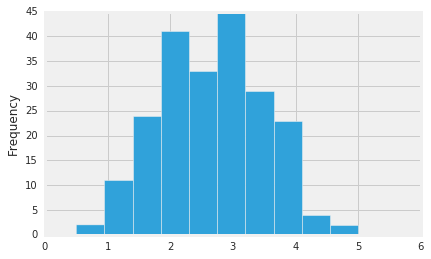

In [60]:
old_ratings['Fandango_Stars'].plot(kind = 'hist')
sns.plt.show()

new_ratings['nr_metascore'].plot(kind = 'hist')
sns.plt.show()

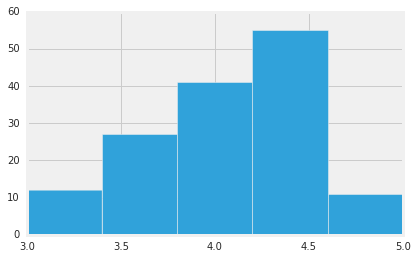

In [61]:
fs = old_ratings['Fandango_Stars']
plt.hist(fs, 5)
plt.show()

- From Hickey's article / README.md, we can see that he has kept the movie on sale in 2015 only & with at least 30 fan ratings on Fandango's website. __The sampling was clearly not random__ because not every movie had the same chance to be included (some movies didn't have a chance at all).

- As it can be read in the README.md of the 2nd data set: the movie must have been released in 2016 or later & with a considerable number of votes and reviews (unclear how many!). __This 2nd sample is also unlikely to be representative of our population__ of interest.

Both these authors had certain research questions in mind, and they used a set of criteria to get a sample that would fit their questions. Their sampling method is __purposive/selective sampling and subjective__. They don't seem too useful for us.

## Changing the Analysis Goal
Two alternatives: either we collect new data, either we change the goal of our analysis by placing some limitations on it. The 2nd choice seems a much faster. Also, it's now really hard to collect a new sample previous to Hickey's analysis.

__New goal__: let's determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

## Isolating the Samples We Need
The two populations I would like to described and compared with each other are all Fandango's ratings for popular movies released in 2015 & in 2016.

Let's use Hickey's benchmark of 30 fan ratings in order to consider a movie as "popular". One quick way to check the representativity of this sample is to sample randomly 10 movies from it and then check the number of fan ratings ourselves on Fandango's website. Ideally, at least 8 out of the 10 movies have 30 fan ratings or more.

In [62]:
fandango_after = new_ratings[['movie', 'year', 'fandango']].copy()
# value of 1 as the random seed
fandango_after.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


As of December 2019, 90% of the movies in our sample are also popular. 
Let's also check the other data set for popular movies. (Eventhough the documentation states clearly that there're only movies with at least 30 fan ratings)

In [63]:
sum(old_ratings['Fandango_votes'] < 30)

0

Let's isolate only the movies released in 2015 and 2016

In [64]:
# extracts year (no special column) from the strings in the FILM column.
old_ratings['Year'] = old_ratings['FILM'].str[-5:-1]
#old_ratings[['FILM', 'Year']][72:77]

In [65]:
old_ratings['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [66]:
old_ratings_2015 = old_ratings[old_ratings['Year'] == '2015'].copy()
old_ratings_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [67]:
new_ratings['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [68]:
new_ratings_2016 = new_ratings[new_ratings['year'] == 2016].copy()
new_ratings_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

### Comparing Distribution Shapes for 2015 and 2016
Let's start by comparing the shape of the two distributions using kernel density plots

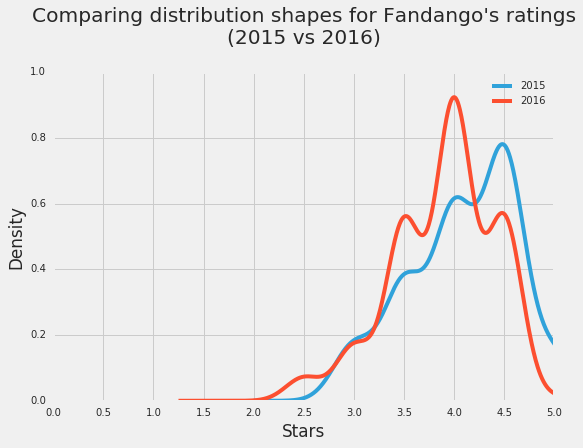

In [69]:
plt.style.use('fivethirtyeight')

old_ratings_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))
new_ratings_2016['fandango'].plot.kde(label = '2016', legend = True)

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07) # the `y` parameter pads the title upward
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(np.arange(0,5.1,.5))
plt.show()

There's a clear difference between the two distributions: movies in 2016 were rated slightly lower than those in 2015. Now let's analyze more granular information.

## Comparing Relative Frequencies
ecause the data sets have different numbers of movies, we normalize the tables and show percentages instead.

In [70]:
print('Percentage for ratings - movie released in 2015:')
print(old_ratings_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100)

print('\nPercentage for ratings - movie released in 2016:')
print(new_ratings_2016['fandango'].value_counts(normalize = True).sort_index() * 100)


Percentage for ratings - movie released in 2015:
3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

Percentage for ratings - movie released in 2016:
2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64


There clearly is a difference between the two frequency distributions. This correlates the conclusion seen on the kernel density plots. I think we need to investigate further to be sure about the direction of the difference...

## Determining the Direction of the Change
Let's get a more precise picture about the direction of the difference with a couple of summary statistics (side note: make the distinction between sample statistics and population parameters)

In [71]:
mean_2015 = old_ratings_2015['Fandango_Stars'].mean()
mean_2016 = new_ratings_2016['fandango'].mean()

median_2015 = old_ratings_2015['Fandango_Stars'].median()
median_2016 = new_ratings_2016['fandango'].median()

mode_2015 = old_ratings_2015['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_2016 = new_ratings_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


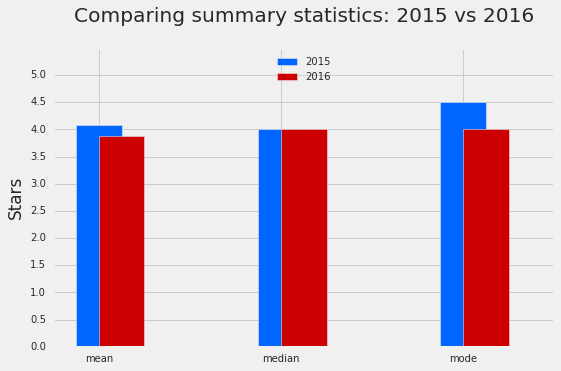

In [72]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()


The mean rating was lower in 2016 with approximately 0.2. This means a drop of almost 5% relative to the mean rating in 2015.

In [73]:
(summary.loc['mean'][0] - summary.loc['mean'][1]) / summary.loc['mean'][0]

0.04842683568951993

The median remains the same for both distributions. The mode is lower in 2016 by 0.5. The direction of the change seen on the kernel density plot is confirmed.

## Conclusion

- This analysis shows that there's still a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. On average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

- What is the cause of this change ? It's hard to tell. It's probably due to the Fandango's fix of the biased rating system after Hickey's analysis.

### Next steps to consider

- Customize graphs more by reproducing almost completely the FiveThirtyEight style. Take a look at this tutorial https://www.dataquest.io/blog/making-538-plots/ if you want to do that.
- Improve this project from a stylistical point of view by following the guidelines discussed in this style guide https://www.dataquest.io/blog/data-science-project-style-guide .
- Use the two samples to compare ratings of different movie ratings aggregators and recommend what's the best website to check for a movie rating. There are many approaches to take here — get some inspiration from this article https://medium.freecodecamp.org/whose-reviews-should-you-trust-imdb-rotten-tomatoes-metacritic-or-fandango-7d1010c6cf19 .
- Collect recent movie ratings data and formulate your own research questions. Take a look at this blog post https://www.dataquest.io/blog/web-scraping-beautifulsoup/ to learn how to scrape movie ratings for IMDB and Metacritic.
